# Convolutional Neural Network(CNN)

### import libraries 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [4]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1164s 7us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

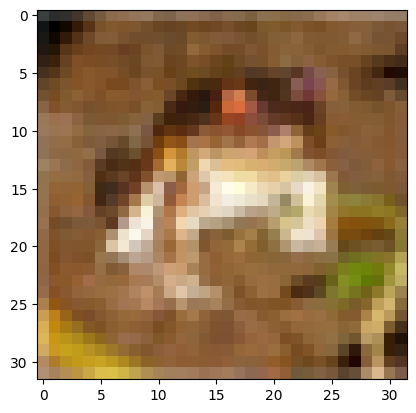

In [7]:
plt.imshow(x_train[0])

In [9]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [10]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index][0]])

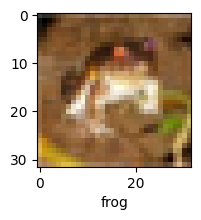

In [11]:
plot_sample(x_train, y_train, 0)

In [12]:
x_train=x_train/255

x_test=x_test/255

### Working of Artifical Neural Network(ANN)

In [13]:
model=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')

])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

c:\Users\Muhammad Anique\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.3025 - loss: 1.9339
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4166 - loss: 1.6421
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4555 - loss: 1.5558
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.4736 - loss: 1.4882
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4899 - loss: 1.4469


In [14]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)

y_pred_class = [np.argmax(i) for i in y_pred]

print("classification report",confusion_matrix(y_test, y_pred_class))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
classification report [[494  33  39  13  33  23  26  16 294  29]
 [ 29 625   8  19  13  31  13  14 146 102]
 [ 94  26 315  64 134 132 109  40  69  17]
 [ 37  34  63 241  46 331 115  23  64  46]
 [ 62  20 119  39 413  97 125  50  65  10]
 [ 25  21  87 116  59 492  86  34  61  19]
 [ 16  21  58  52 112 108 568   9  36  20]
 [ 44  35  49  53 101 123  43 431  59  62]
 [ 54  56   3  13  13  30   9  10 779  33]
 [ 39 193   4  23  15  32  32  26 185 451]]


### Working of Convolutional Neural Networks(CNN)

In [15]:
cnn=keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

c:\Users\Muhammad Anique\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3746 - loss: 1.7294
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5825 - loss: 1.1916
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6333 - loss: 1.0455
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6708 - loss: 0.9411
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6984 - loss: 0.8651
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7139 - loss: 0.8217
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7330 - loss: 0.7597
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7476 - loss: 0.7217
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7603 - loss: 0.6809
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7746 - loss: 0.6454


In [16]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6981 - loss: 0.9088


[0.9211449027061462, 0.6935999989509583]

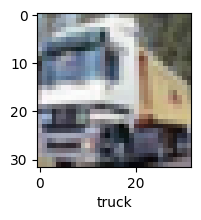

In [17]:
plot_sample(x_train, y_train, 1)

In [18]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[2.0296244e-02, 1.2651192e-03, 1.4048411e-02, 7.2703439e-01,
        6.8696379e-03, 3.2727845e-02, 4.9465094e-03, 1.1978564e-03,
        1.8502414e-01, 6.5898094e-03],
       [2.9668791e-02, 5.8304571e-02, 1.8921555e-06, 9.7439966e-05,
        4.6306013e-06, 1.8653260e-07, 2.6512640e-07, 6.4721473e-07,
        9.0653831e-01, 5.3832126e-03],
       [7.9677776e-02, 2.6993437e-02, 1.4440665e-03, 5.3103350e-02,
        3.7774227e-03, 1.7529853e-03, 1.6299800e-03, 2.7745173e-03,
        8.1368971e-01, 1.5156696e-02],
       [9.7010517e-01, 9.0773619e-04, 5.3264904e-03, 4.1091818e-04,
        4.0257950e-03, 2.6537566e-05, 3.3951162e-03, 4.6729911e-06,
        1.5719915e-02, 7.7593904e-05],
       [2.0226704e-05, 8.1703101e-06, 3.3394985e-02, 3.6865417e-02,
        1.0750280e-01, 1.7398288e-03, 8.2045060e-01, 4.3263226e-06,
        1.3467365e-05, 2.3114032e-07]], dtype=float32)

In [19]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [20]:
from sklearn.metrics import classification_report
print("classification Report",classification_report(y_test, y_classes) )

classification Report               precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.84      0.77      0.81      1000
           2       0.62      0.53      0.57      1000
           3       0.46      0.56      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.58      0.65      0.61      1000
           6       0.76      0.75      0.76      1000
           7       0.76      0.74      0.75      1000
           8       0.88      0.71      0.79      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000

